# MMDGraph

## What is this package for?

This package contains code to perform kernel two-sample hypothesis testing on samples of graphs. The code additionally allows for estimation of graphs from a real data matrix.


## How to install

<code> pip install GTST </code>

## Usage

We will go thorugh multiple scenariros: The case when the user has it own networkx graphs, when they are estimated from data matricies, using different kernels and using different MMD estimators.

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import GTST

### Fit when H1 true, different edge probability

In this example, we simulate binomial graphs assuming that samples two have different edge probabilties. There will be 50 graphs in each sample and the number of nodes is 30 for all graphs. Sample 1 has edge probabilty 0.3 and sample 2 has edge probability 0.4. We will label each node with its corresponding degree so that graph kernels that assume labels can be used.

Start by creating sample graphs

In [3]:

n1 = n2 = 50  # sample sizes
# generate two samples
g1 = [nx.fast_gnp_random_graph(30,0.3) for _ in range(n1)]
g2 = [nx.fast_gnp_random_graph(30,0.4) for _ in range(n2)]

# Set node labels as the degree
for j in range(len(g1)):
    nx.set_node_attributes(g1[j],  {key: str(value) for key, value in dict(g1[j].degree).items()} , 'label')
for j in range(len(g2)):
    nx.set_node_attributes(g2[j], {key: str(value) for key, value in dict(g2[j].degree).items()}, 'label')


Perform MMD test using various kernels. Note that the unbiases MMD estimator is used

In [4]:
# Random Walk, r is number of eigen-pairs, c is the discount constant
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 6, c = 0.001)  
print(f" RW_ARKU_plus {MMD_out.p_values}")

 RW_ARKU_plus {'MMD_u': 0.0}


In [5]:
# RW kernel with labels, Note that we input the label list (all node labels encountered in both graph samples)
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'RW_ARKL', mmd_estimators = 'MMD_u', r = 4, c = 1e-3,node_label = 'label',
                                    unique_node_labels= set(np.concatenate([list(nx.get_node_attributes(g, 'label').values())for g in g1+g2])))
print(f" RW_ARKL {MMD_out.p_values}")


Using label as node labels
 RW_ARKL {'MMD_u': 0.0}


In [6]:
# GNTK kernel,
# num_layers is number of layers in neural network,
# num_mlp_layers is number of multi-layer perceptron layeres
# jk indicate whether to add jumping knowledge
# scale how to aggregate neighbours uniform or degree.
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'GNTK', mmd_estimators = 'MMD_u', num_layers = 2, num_mlp_lauers = 2, jk = True, scale = 'uniform')
print(f" GNTK {MMD_out.p_values}")

100%|██████████| 5050/5050.0 [00:11<00:00, 438.12it/s]

 GNTK {'MMD_u': 0.0}


In [8]:
# WWL kernel
# discount is discount
# h is number of WL iterations
# node_label is name of node labels
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'WWL', mmd_estimators = 'MMD_u', discount = 0.1, h = 2, node_label = 'label')
print(f" WWL {MMD_out.p_values}")

Using label as node labels
 WWL {'MMD_u': 0.0}


In [9]:
# Deep Kernel without the deepness
# type is wl= wl closeness or sp: shortest path closeness
# wl_it is number of wl iterations, only applicable for wl.
# no deepness in this case only a frequency similarity
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'DK', mmd_estimators = 'MMD_u', type = 'wl', wl_it = 4, node_label = 'label')
print(f" ML DK {MMD_out.p_values}")

Using label as node labels
 ML DK {'MMD_u': 0.0}


In [171]:

# Deep kernel with deepness, user has to install gensim, this might take some time, can try to increase number of workers
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'DK', mmd_estimators = 'MMD_u', type = 'wl', wl_it = 4, opt_type = 'word2vec', node_label = 'label', workers = 10)
print(f" Deep DK {MMD_out.p_values}")

Using label as node labels
 Deep DK {'MMD_u': 0.0}


In [172]:
# It is also possible to use the Grakel library
kernel = [{"name": "weisfeiler_lehman", "n_iter": 1}, {"name": "vertex_histogram"}]
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = kernel, mmd_estimators = 'MMD_u', node_label = 'label')
print(f" WL {MMD_out.p_values}")

Using label as node labels
label
 WL {'MMD_u': 0.0}


In [ ]:
# Grakel propagation
kernel = [ {"name":"propagation", 't_max':5, 'w':0.1, 'M':"TV"}]
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = kernel, mmd_estimators = 'MMD_u', node_label = 'label')
print(f" propagation {MMD_out.p_values}")


Using label as node labels
label
 propagation {'MMD_u': 0.0}


### Using different MMD estimators

It is also pssobile to use other MMD estimators such as the biases, linear and robust.

In [ ]:
# Q is the number of partitions in the MONK estimator

MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'RW_ARKU_plus', mmd_estimators = ['MMD_u', 'MMD_b', 'MMD_l', 'MONK_EST'], r = 2, c = 0.001, Q = 5)
print(f" RW_ARKU_plus {MMD_out.p_values}")

c:\Users\User\Code\MMDGraph\MMDGraph\kernels\RandomWalk.py:560: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


 RW_ARKU_plus {'MMD_u': 0.0, 'MMD_b': 0.0, 'MMD_l': 0.0, 'MONK_EST': 0.0}


### H1 true, Graphs with different weights

It is possible to test graphs which are topologically the same but have different edge weights. Here there are 50 graphs in each sample and the number of nodes is 30 for all graphs. The edge probabilty is 0.3. We will label each node with its corresponding degree so that graph kernels that assume labels can be used.

In [87]:
n1 = n2 = 100
g1_weights = [nx.fast_gnp_random_graph(30,0.3) for _ in range(n1)]  # sample 1
g2_weights = [nx.fast_gnp_random_graph(30,0.3) for _ in range(n2)]  # sample 2

# For loops to label each node accoriding to its degree for the two samples.
for j in range(len(g1_weights)):
    nx.set_node_attributes(g1_weights[j],  {key: str(value) for key, value in dict(g1_weights[j].degree).items()} , 'label')
for j in range(len(g2_weights)):
    nx.set_node_attributes(g2_weights[j], {key: str(value) for key, value in dict(g2_weights[j].degree).items()}, 'label')


# For loops for the two samples and functions to generate random weights with uniform distribution
def edge_dist(loc, scale ):
    from scipy.stats import uniform
    return np.random.normal(loc = loc, scale = scale)# uniform.rvs(size=1,  loc = loc , scale = scale)[0]
def add_weight(G, loc, scale ):
    edge_w = dict()
    for e in G.edges():
        edge_w[e] = edge_dist(loc, scale)
    return edge_w


for G in g1_weights:
    nx.set_edge_attributes(G, add_weight(G, loc = 0.5, scale = 1), "weight")
for G in g2_weights:
    nx.set_edge_attributes(G, add_weight(G, loc = 0.5, scale = 2), "weight")


In [77]:
# Random Walk
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1_weights, G2 = g2_weights, kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 2, c = 0.001, edge_attr = 'weight')
print(f" RW_ARKU_plus {MMD_out.p_values}")

Using weight as edge attributes
 RW_ARKU_plus {'MMD_u': 0.0}


Note that if we use a graph kernel that does not take edge weights into account, the test will not be rejected

In [79]:
# Random Walk weights ignored, should not reject
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1_weights, G2 = g2_weights, kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 2, c = 0.001)
print(f" RW_ARKU_plus no labels {MMD_out.p_values}")

 RW_ARKU_plus no labels {'MMD_u': 0.462}


In [80]:
# Grakel pyramid match kernel
kernel = [{"name": "pyramid_match", "L": 6, "d":6, 'with_labels':False}]
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1_weights, G2 = g2_weights, kernel = kernel, mmd_estimators = 'MMD_u', edge_attr = 'weight')
print(f" pyramid_match {MMD_out.p_values}")

Using weight as edge attributes
None
 pyramid_match {'MMD_u': 0.0}


In [85]:
# propagation, needs node attribute or label 
kernel = [ {"name":"propagation", 't_max':5, 'w':0.05, 'M':"TV"}]
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1_weights, G2 = g2_weights, kernel = kernel, mmd_estimators = 'MMD_u', edge_attr = 'weight', node_label = 'label')
print(f" propagation {MMD_out.p_values}")

Using weight as edge attributes
Using label as node labels
label
 propagation {'MMD_u': 0.0}


 ### H1 true different attributes

Some kernels can be used to compare graph with node attributes

In [88]:

n1 = n2 = 50
g1_attr = [nx.fast_gnp_random_graph(30,0.2) for _ in range(n1)]  # sample 1
g2_attr = [nx.fast_gnp_random_graph(30,0.2) for _ in range(n2)]  # sample 2
# For loop for the two samples to add node attributes for each graph which have different normal distributions
for j in range(len(g1_attr)):
    nx.set_node_attributes(g1_attr[j], dict( ( (i, np.random.normal(loc = 0, scale = 0.1, size = (1,))) for i in range(len(g1_attr[j])) ) ), 'attr')
for j in range(len(g2_attr)):
    nx.set_node_attributes(g2_attr[j], dict( ( (i, np.random.normal(loc = 0.1, scale = 0.1, size = (1,))) for i in range(len(g2_attr[j])) ) ), 'attr')


In [89]:
# Random Walk with weights and node attributes
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1_attr, G2 = g2_attr, kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 4, c = 0.01, node_attr = 'attr')
print(f" RW_ARKU_plus {MMD_out.p_values}")

Using attr as node attributes


c:\Users\User\Code\MMDGraph\MMDGraph\kernels\RandomWalk.py:560: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


 RW_ARKU_plus {'MMD_u': 0.0}


In [90]:
# GNTK with node attributes
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1_attr, G2 = g2_attr, kernel = 'GNTK', mmd_estimators = 'MMD_u', num_layers = 2, num_mlp_lauers = 2, jk = True, scale = 'uniform', node_attr = 'attr')
print(f" GNTK {MMD_out.p_values}")

Using attr as node attributes


100%|██████████| 5050/5050.0 [00:04<00:00, 1246.33it/s]


 GNTK {'MMD_u': 0.0}


In [91]:
# Grakel propagation
kernel = [ {"name":"propagation", 't_max':5, 'w':0.1, 'M':"L1",'with_attributes':True}]
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1_attr, G2 = g2_attr, kernel = kernel, mmd_estimators = 'MMD_u', discount = 0.1, h = 2, node_attr = 'attr')
print(f" Propagation {MMD_out.p_values}")

Using attr as node attributes
attr


c:\Users\User\Code\MMDGraph\.mmdvenv8\lib\site-packages\grakel\kernels\propagation.py:527: RuntimeWarning: invalid value encountered in true_divide
  transition_matrix[n] = (T.T / np.sum(T, axis=1)).T


 Propagation {'MMD_u': 0.0}


### Different edge labels

The RW kernel can take different edge labels

In [134]:
n1 = n2 = 50
g1_edge = [nx.fast_gnp_random_graph(30,0.3) for _ in range(n1)]  # sample 1
g2_edge = [nx.fast_gnp_random_graph(30,0.3) for _ in range(n2)]  # sample 2

# For loop to label each edge either 'a' or 'b' the labelling probabilities are different for the two samples
for j in range(len(g1_edge)):
    nx.set_edge_attributes(g1_edge[j], {(i,k):np.random.choice(['a','b'], p = [0.6,0.4]) for i,k in g1_edge[j].edges }, 'edge_label')
for j in range(len(g2_edge)):
    nx.set_edge_attributes(g2_edge[j], {(i,k):np.random.choice(['a','b'], p = [0.7,0.3]) for i,k in g2_edge[j].edges }, 'edge_label')




In [135]:
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1_edge, G2 = g2_edge, kernel = 'RW_ARKU_edge', mmd_estimators = 'MMD_u', r = 6, c = 0.0001,edge_label = 'edge_label',unique_edge_labels= ['a', 'b'])
print(f" RW_ARKU_edge {MMD_out.p_values}")


Using edge_label as edge labels
 RW_ARKU_edge {'MMD_u': 0.0}


# Directed Graphs

The RW kernel can take directed graphs



In [143]:
n1 = n2 = 50
g1_di = [nx.fast_gnp_random_graph(30,0.2) for _ in range(n1)]  # sample 1
g2_di = [nx.fast_gnp_random_graph(30,0.2) for _ in range(n2)]  # sample 2

# for loop for both samples to convert the networkx graph to a networkx directed graph object
for j in range(len(g1_di)):
    g1_di[j] = nx.DiGraph(g1_di[j])
for j in range(len(g2_di)):
    g2_di[j] = nx.DiGraph(g2_di[j])

# for loop for both samples that removes edges with different removal probabilties between the two samples
for j in range(len(g1_di)):
    edges= list(g1_di[j].edges())
    for e,u in edges:
        if np.random.uniform() <0.3:
            g1_di[j].remove_edge(e,u)
for j in range(len(g2_di)):
    edges= list(g2_di[j].edges())
    for e,u in edges:
        if np.random.uniform() <0.5:
            g2_di[j].remove_edge(e,u)






In [144]:
MMD_out = GTST.MMD()
MMD_out.fit(G1 = g1_di, G2 = g2_di, kernel = 'RW_ARKU', mmd_estimators = 'MMD_u', r = 4, c = 1e-3)
print(f" RW_ARKU_edge {MMD_out.p_values}")


 RW_ARKU_edge {'MMD_u': 0.0}


### Two data matrices different structure
It is possible to estimate graphs from data matrices

In [160]:
G = nx.fast_gnp_random_graph(11, 0.25, seed=42)  # generate a random graph
assert nx.is_connected(G)

#  Add random weights to the graphs, either positive or negative
for e in G.edges():
    if np.random.uniform() <0.1:
        w = np.random.uniform(low = 0.1, high = 0.3)
        G.edges[e[0], e[1]]['weight'] = -w
    else:
        w = np.random.uniform(low = 0.1, high = 0.3)
        G.edges[e[0], e[1]]['weight'] = w

# Extract adjacency matrix and fill the diagonal so that the resulting matrix will be positive definite.
A = np.array(nx.adjacency_matrix(G).todense())
np.fill_diagonal(A, np.sum(np.abs(A), axis = 1)+0.1)

# Copy the adjacency matrix, and remove some edges for that graph,  note the seed is assume to be 45 when G was constructed
A_s = A.copy()
A_s[7,4] = 0
A_s[4,7] = 0
A_s[5,2] = 0
A_s[2,5] = 0


# Simulate random variables one has A as its precision and one has A_s (the sparse copy of A) as its precision matrix.
# Note the precision matrix is the inverse covariance.
X1 = np.random.multivariate_normal(np.zeros(11),np.linalg.inv(A), size = 10000)
X2 = np.random.multivariate_normal(np.zeros(11),np.linalg.inv(A_s), size = 10000)

C:\Users\User\AppData\Local\Temp\ipykernel_27300\781483305.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(G).todense())


Input the two samples X1 and X2 to the class method estimate_graphs. Which estimates graphs according to a window size. The best estimation is selected via the EBIC criterion.

In [161]:
# window size = 200 so 10000/200 = 50 graphs in each sample. (200 observations used to estimate each graph.)
# Nonparanormal, should the nonparanormal transformation be performed on the data matrices.
# Scale should the data be scaled.
# Random Walk
MMD_out = GTST.MMD()
MMD_out.estimate_graphs(X1,X2,window_size=200, alpha = np.exp(np.linspace(-5,-2,100)),beta = 0.5, nonparanormal=False,scale = False)
MMD_out.fit( kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 5, c = 0.1, edge_attr = 'weight')
print(MMD_out.p_values)



Using weight as edge attributes


c:\Users\User\Code\MMDGraph\MMDGraph\kernels\RandomWalk.py:560: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


{'MMD_u': 0.001}


In [162]:
# We can set node labels as degree (or define our own labelling, see below)
MMD_out = GTST.MMD()
kernel = [{"name": "weisfeiler_lehman", "n_iter": 4}, {"name": "vertex_histogram"}]
MMD_out.estimate_graphs(X1,X2,window_size=200, alpha = np.exp(np.linspace(-5,-2,100)),beta = 0.5, nonparanormal=False,scale = False, set_labels="degree")
MMD_out.fit( kernel = kernel, mmd_estimators = 'MMD_u',  edge_attr = 'weight')
print(MMD_out.p_values)

Using weight as edge attributes
Using label as node labels
label
{'MMD_u': 0.002}


Plot estimated estimated graphs and compare to the true.

Text(0.5, 1.0, 'One estimated precision structure from sample 2')

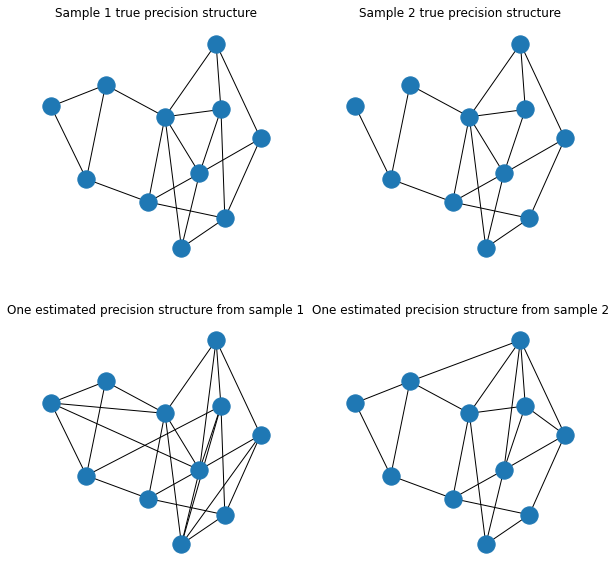

In [149]:
np.fill_diagonal(A_s,0)
fig, ax = plt.subplots(2,2,figsize = (10,10))
pos = nx.kamada_kawai_layout(G, weight = None)
nx.draw(G, pos = pos, ax = ax[0,0])
nx.draw(nx.from_numpy_array(A_s), pos = pos, ax = ax[0,1])
nx.draw(MMD_out.G1[3], pos = pos, ax = ax[1,0])  # select graph number 3 in sample 1
nx.draw(MMD_out.G2[3], pos = pos, ax = ax[1,1])  # select graph number 3 in sample 2
ax[0,0].set_title("Sample 1 true precision structure")
ax[0,1].set_title("Sample 2 true precision structure")
ax[1,0].set_title("One estimated precision structure from sample 1")
ax[1,1].set_title("One estimated precision structure from sample 2")

### Two data matrices same structure different attributes
It is possible to estimate the graphs beforehand and apply a function to get node attributes

In [163]:
# Generate random samples that have the same underlying precision matrix/graph, but the node have different mean.

G = nx.fast_gnp_random_graph(11, 0.25, seed = 42)
assert nx.is_connected(G)

for e in G.edges():
    if np.random.uniform() <0.1:
        w = np.random.uniform(low = 0.1, high = 0.3)
        G.edges[e[0], e[1]]['weight'] = -w
    else:
        w = np.random.uniform(low = 0.1, high = 0.3)
        G.edges[e[0], e[1]]['weight'] = w

A = np.array(nx.adjacency_matrix(G).todense())
np.fill_diagonal(A, np.sum(np.abs(A), axis = 1)+0.1)


X1 = np.random.multivariate_normal(np.zeros(11),np.linalg.inv(A), size = 10000)
X2 = np.random.multivariate_normal(np.ones(11),np.linalg.inv(A), size = 10000)

C:\Users\User\AppData\Local\Temp\ipykernel_27300\3967309861.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(G).todense())


In [164]:
# Random Walk, with attributes, should reject. , the class will use the node label name 'attr'
# Define attribute function that sets the mean as the node attribute. 
# Note the window size is 400 so there will be 400 observations that are used to estimate each graph/node attribute.
def attr_function(X):
    return np.expand_dims(np.mean(X,axis = 0),axis=1)

MMD_out = GTST.MMD()
MMD_out.estimate_graphs(X1,X2,window_size=400, alpha = np.exp(np.linspace(-5,-2,100)),beta = 0.5, nonparanormal=False,scale = False, set_attributes = attr_function)
MMD_out.fit( kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 5, c = 0.1, edge_attr = 'weight', node_attr = 'attr')
print(MMD_out.p_values)

Using weight as edge attributes
Using attr as node attributes


c:\Users\User\Code\MMDGraph\MMDGraph\kernels\RandomWalk.py:560: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return scipy.sparse.csr_matrix(nx.adjacency_matrix(G ,weight=edge_attr), dtype=np.float64)


{'MMD_u': 0.0}


In [166]:
# If we do not give attributes, the test should not be rejected reject as underlying the precision matrices are the same
MMD_out_no_attr = GTST.MMD()
MMD_out_no_attr.fit(G1= MMD_out.G1, G2 = MMD_out.G2, kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 5, c = 0.1, edge_attr = 'weight')
print(MMD_out_no_attr.p_values)

Using weight as edge attributes
{'MMD_u': 0.993}


In [168]:
# We can also try to make a label function, has to be a dictionary, the class will use the node label name 'label'
# Note we label the nodes with the rounded mean
def label_function(X):
    m = np.mean(X,axis = 0)
    return {i:str(np.round(m[i],1)) for i in range(len(m))}

kernel = [{"name": "weisfeiler_lehman", "n_iter": 2}, {"name": "vertex_histogram"}]
MMD_out = GTST.MMD()
MMD_out.estimate_graphs(X1,X2,window_size=400, alpha = np.exp(np.linspace(-5,-2,100)),beta = 0.5, nonparanormal=False,scale = False, set_labels= label_function)
MMD_out.fit(kernel = kernel, mmd_estimators = 'MMD_u', node_label = 'label')
print(MMD_out.p_values)

Using label as node labels
label
{'MMD_u': 0.0}


In [169]:
# We can also define labels using a dict
# '1' for sample 1, '2' for sample 2. Graph nr. j gets the list ['a']*6 + ['b']*5
# meaning the first 6 nodes will be labelled 'a' and the last 5 nodes will be labelled 'b' for sample 1 but
# the first 4 nodes will be labelled 'a' and the last 7 nodes will be labelled 'b' for sample 2
label_dict = {'1':{j:i for j,i in enumerate(['a']*6 + ['b']*5)}, 
              '2':{j:i for j,i in enumerate(['a']*4 + ['b']*7)}}
kernel = [{"name": "weisfeiler_lehman", "n_iter": 2}, {"name": "vertex_histogram"}]
MMD_out = GTST.MMD()
MMD_out.estimate_graphs(X1,X2,window_size=400, alpha = np.exp(np.linspace(-5,-2,100)),beta = 0.5, nonparanormal=False,scale = False, set_labels= label_dict)
MMD_out.fit(kernel = kernel, mmd_estimators = 'MMD_u', node_label = 'label')
print(MMD_out.p_values)

Using label as node labels
label
{'MMD_u': 0.0}
